# Music Genre Classification Using Principal Component Analysis (PCA)

Introduction:
Music genre classification is a crucial task in the field of music information retrieval (MIR), aiding in the organization and recommendation of songs based on their features. This project focuses on applying Principal Component Analysis (PCA) to reduce the dimensionality of music features while maintaining essential information for accurate genre classification. By leveraging PCA, we aim to optimize the performance of machine learning models and enhance their ability to classify music genres efficiently.

## Project Objectives:

1- Feature Extraction: Extract relevant audio features such as tempo, rhythm, frequency, and spectral characteristics from the music dataset.

2- Dimensionality Reduction with PCA: Apply PCA to reduce the dimensionality of the dataset while preserving the most critical features.

3- Build Classification Models: Implement machine learning models such as Logistic Regression, Decision Trees, or Support Vector Machines (SVM) to classify music genres.

4-Evaluate Model Performance: Measure the performance of the models using accuracy, precision, recall, and F1 score, comparing results before and after PCA implementation.

5-Optimize Genre Classification: Use the reduced feature set from PCA to optimize the classification process, reducing computational costs while maintaining model accuracy.

## Requirements:

Python 3.8+

Libraries:

numpy for numerical computations

pandas for data manipulation

scikit-learn for PCA and machine learning algorithms

matplotlib and seaborn for visualizing the results

Jupyter Notebook for project organization and execution

## Data Overview:
The dataset used for this project consists of 1,000 entries and 13 columns, each representing different audio features and a genre label. The data captures key characteristics of music tracks to enable genre classification through machine learning. Below is a summary of the columns in the dataset:

Tempo: Numeric feature representing the speed of the music in beats per minute (BPM).

Dynamics Range: Numeric feature indicating the variation in loudness throughout the track.

Vocal Presence: A numeric value measuring the prominence of vocals in the track.

Percussion Strength: Quantifies the strength and presence of percussion instruments in the music.

String Instrument Detection: Indicates the presence of string instruments in the track.

Electronic Element Presence: Represents the influence of electronic elements in the track.

Rhythm Complexity: Numeric value representing the complexity of the rhythm structure in the music.

Drums Influence: Measures the impact of drums on the overall track.

Distorted Guitar: Indicates whether distorted guitar elements are present.

Metal Frequencies: Represents the prominence of higher, metal-like frequencies in the track.

Ambient Sound Influence: Measures the presence of ambient or background sounds in the track.

Instrumental Overlaps: Quantifies how much different instrumental sounds overlap or coexist in the track.

Genre: Categorical column containing the genre labels for each track. Out of 1,000 entries, 890 entries have non-null genre labels, while 110 entries have missing or undefined genre labels.

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import scipy

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report, accuracy_score 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# reading the dataset
data= pd.read_csv(r"C:\Users\compu magic\Downloads\music_dataset_mod.csv")
data.tail(10)

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
990,145.665597,28.642070,52.657254,7.204516,94.165273,7.130571,78.159682,73.616978,94.777354,93.121865,46.236654,77.689609,NaN
991,130.719110,65.990957,21.775950,91.817048,34.029452,105.525736,28.552899,99.587397,1.414556,0.000000,59.447447,74.901837,NaN
992,117.892313,35.001524,76.506358,77.972570,80.765657,13.759213,59.985923,80.108786,93.831262,100.000000,15.851851,47.984445,NaN
993,104.315096,26.173723,3.334345,42.132602,38.434513,66.522798,62.051560,79.475348,61.390214,52.925363,50.383816,52.630256,NaN
994,121.863373,50.872678,70.100162,106.212013,66.573813,89.927526,3.009635,79.634816,15.398297,31.235519,11.997421,57.281283,NaN
995,66.578839,54.533872,99.782246,95.633310,91.414514,19.396142,36.280860,78.298955,4.890606,4.638077,75.479656,95.990077,NaN
996,126.570862,57.812829,90.809940,64.880583,40.437517,38.051344,66.204244,95.770959,1.745673,6.729019,82.042218,43.590027,Classical
997,121.731543,51.385204,33.849400,17.044544,84.483481,13.312790,8.953013,64.068960,90.738580,96.043437,5.499350,74.604889,Rock
998,97.070804,19.210429,62.662860,22.720453,66.917937,80.590809,51.403310,50.828636,68.518232,55.119045,21.781372,24.716517,Rock
999,71.050781,32.967250,62.875776,78.868747,88.094454,59.148014,83.420324,59.582109,37.329193,44.576693,87.458414,78.270683,Jazz


In [3]:
# converting the data to data frame 
df=pd.DataFrame(data)
df.head(5)

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,Country
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,Classical
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,Rock
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,Hip-hop
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,Country


In [4]:
# there is 110 null row in genre column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Tempo                        1000 non-null   float64
 1   Dynamics Range               1000 non-null   float64
 2   Vocal Presence               1000 non-null   float64
 3   Percussion Strength          1000 non-null   float64
 4   String Instrument Detection  1000 non-null   float64
 5   Electronic Element Presence  1000 non-null   float64
 6   Rhythm Complexity            1000 non-null   float64
 7   Drums Influence              1000 non-null   float64
 8   Distorted Guitar             1000 non-null   float64
 9   Metal Frequencies            1000 non-null   float64
 10  Ambient Sound Influence      1000 non-null   float64
 11  Instrumental Overlaps        1000 non-null   float64
 12  Genre                        890 non-null    object 
dtypes: float64(12), obj

In [5]:
# iidentifying how many generes are in the data
df['Genre'].unique()

array(['Country', 'Classical', 'Rock', 'Hip-hop', nan, 'Jazz'],
      dtype=object)

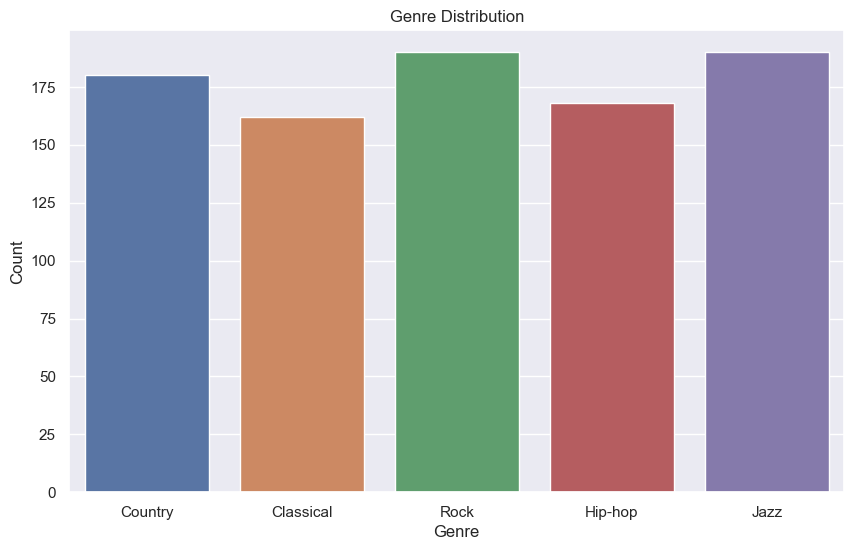

In [6]:
# exploring target column destribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Genre', data=df)
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

In [7]:
# removing null values 
df_copy= df.copy()
df_copy['genre']= df['Genre'].dropna()

In [8]:
# encoding target column
encoder= LabelEncoder()
gener_encoded= encoder.fit_transform(df['Genre'])

In [9]:
df_copy['Genre']= gener_encoded
df_copy.drop(columns= "genre", inplace= True)
df_copy

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
0,114.618354,57.976367,53.251766,99.061840,14.686768,17.628630,46.545522,75.839434,79.378892,71.753088,96.439665,53.771763,1
1,116.672803,69.387087,95.787280,90.831033,47.280419,-15.618194,85.421085,100.455908,0.713015,0.000000,17.327295,15.017146,0
2,128.328121,52.930677,65.701187,104.439247,5.984994,50.467388,18.006722,77.642913,80.652946,87.692110,95.125207,25.308020,4
3,128.511337,25.494755,14.095374,40.106130,47.715584,87.335201,68.603329,63.536557,74.888346,76.239108,97.016998,96.893109,2
4,135.474190,45.174876,101.469872,70.002203,108.177637,25.865590,31.295163,81.121030,36.178193,23.381542,53.753793,30.142986,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,66.578839,54.533872,99.782246,95.633310,91.414514,19.396142,36.280860,78.298955,4.890606,4.638077,75.479656,95.990077,5
996,126.570862,57.812829,90.809940,64.880583,40.437517,38.051344,66.204244,95.770959,1.745673,6.729019,82.042218,43.590027,0
997,121.731543,51.385204,33.849400,17.044544,84.483481,13.312790,8.953013,64.068960,90.738580,96.043437,5.499350,74.604889,4
998,97.070804,19.210429,62.662860,22.720453,66.917937,80.590809,51.403310,50.828636,68.518232,55.119045,21.781372,24.716517,4


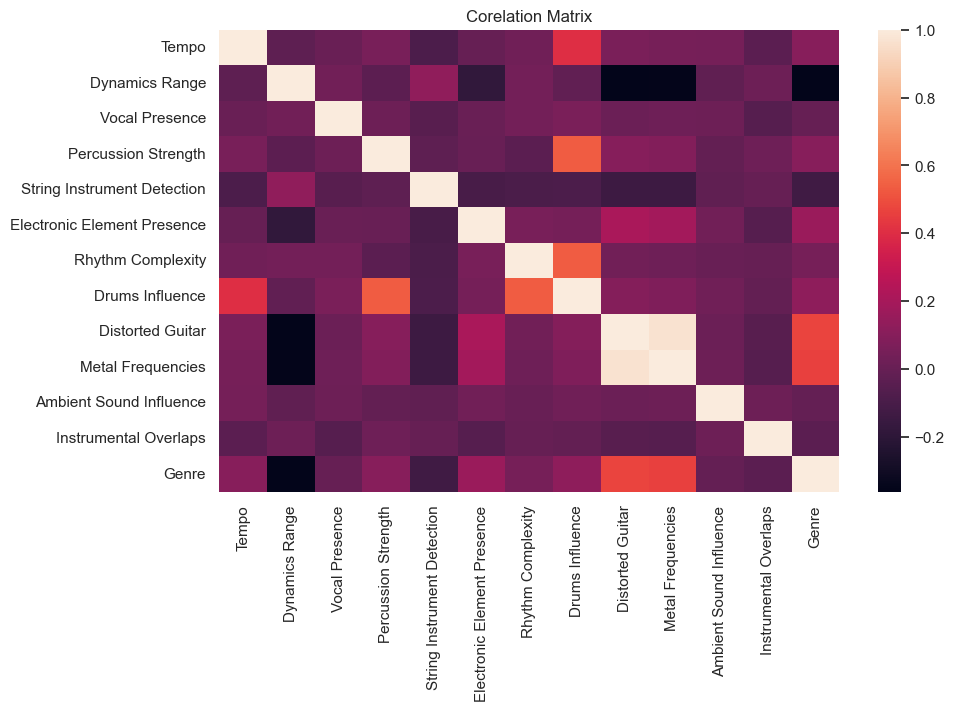

In [10]:
#calculating corelation
corr= df_copy.corr()

#ploting the correlation
plt.figure(figsize=(10, 6))
sns.heatmap(corr)
plt.title('Corelation Matrix')
plt.show()

In [11]:
#spliting the data into target and futures 
X= df_copy.drop(columns='Genre')
y= df_copy['Genre']

In [12]:
#standarize the data
scaler= StandardScaler()
x_scaled= scaler.fit_transform(X)

In [13]:
pca= PCA()
x_transf= pca.fit_transform(x_scaled)

In [14]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.20124871, 0.15042515, 0.09266609, 0.08680459, 0.08516604,
       0.08178983, 0.07900191, 0.07737509, 0.06854972, 0.06176162,
       0.01235041, 0.00286083])

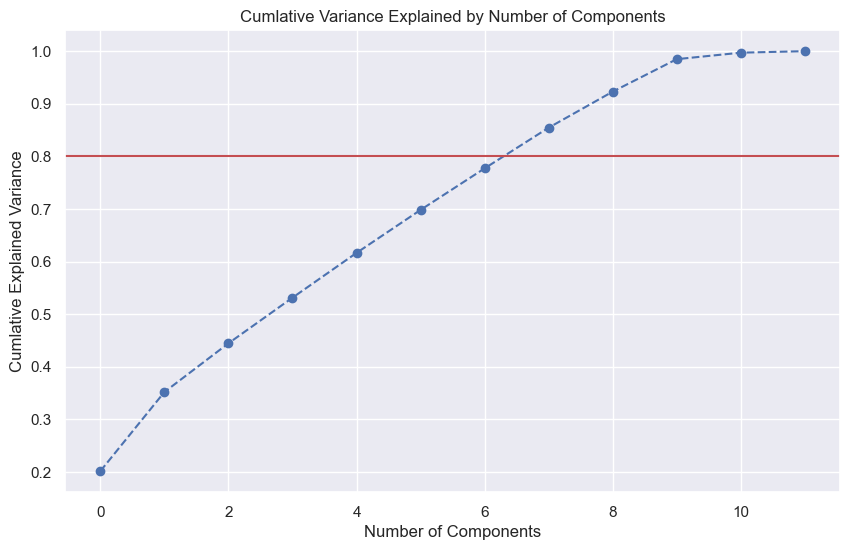

In [15]:
#ploting the cummative variance
cumulative_explained_variance= np.cumsum(explained_variance)

plt.figure(figsize=(10, 6))
plt.plot(cumulative_explained_variance, marker='o', linestyle='--')
plt.axhline(y=0.8, color='r', linestyle='-')
plt.title('Cumlative Variance Explained by Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumlative Explained Variance')
plt.show()

In [16]:
# we use first 8 components 
n_components= 8
pca_6= PCA(n_components=n_components)
x_pca= pca_6.fit_transform(x_scaled)

## logisitic regression with pca

In [17]:
# spliting the dataset into train and test 
X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size = 0.3, random_state = 42)

In [18]:
# train classifier 
model= LogisticRegression(max_iter= 1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

## predecting and evaluating the model 

In [19]:
y_pred= model.predict(X_test)

In [20]:
accuracy= accuracy_score(y_pred, y_test)
print("Accuracy with pca {accuracy}")

Accuracy with pca {accuracy}


In [21]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.96      0.68      0.80        78
           1       0.30      0.41      0.35        39
           2       0.36      0.31      0.33        51
           3       0.54      0.44      0.48        73
           4       0.54      0.49      0.51        57
           5       0.00      0.00      0.00         2

    accuracy                           0.48       300
   macro avg       0.45      0.39      0.41       300
weighted avg       0.58      0.48      0.52       300



## logistic regression with original features

In [22]:
# spliting the data into target and features 
X_train_org, X_test_org, y_train_org, y_test_org = train_test_split(x_scaled, y, test_size = 0.3, random_state = 42)

In [23]:
model1= LogisticRegression(max_iter= 1000)
model1.fit(X_train_org,y_train_org)

LogisticRegression(max_iter=1000)

In [24]:
y_pred_org= model1.predict(X_test_org)

In [30]:
accuracy= accuracy_score(y_pred_org, y_test)
print(f"Accuracy with original features: {accuracy}")

Accuracy with original features: 0.5133333333333333


In [31]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.96      0.68      0.80        78
           1       0.30      0.41      0.35        39
           2       0.36      0.31      0.33        51
           3       0.54      0.44      0.48        73
           4       0.54      0.49      0.51        57
           5       0.00      0.00      0.00         2

    accuracy                           0.48       300
   macro avg       0.45      0.39      0.41       300
weighted avg       0.58      0.48      0.52       300



In [32]:
unknown_genre_data = df[df['Genre'].isna()]
unknown_genre_data

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
13,104.389822,65.826509,45.855410,55.655533,76.058845,55.625315,25.312585,59.202818,0.920308,0.000000,94.308889,27.441046,NaN
18,101.367152,47.843370,93.230347,67.101777,20.932163,50.772288,30.348312,62.950165,64.462755,68.971944,21.690071,94.717315,NaN
22,85.130539,55.707108,81.149615,21.473425,14.959208,61.017283,64.000152,43.332846,70.455879,79.053598,20.420619,99.499498,NaN
31,121.100952,71.769727,49.609529,82.539647,47.670106,119.460607,68.812707,83.727876,95.307620,95.779062,2.883916,19.230684,NaN
42,93.546825,44.563761,56.587554,99.546134,109.735122,30.128106,48.392807,81.888793,97.200948,100.000000,16.380240,55.483399,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,130.719110,65.990957,21.775950,91.817048,34.029452,105.525736,28.552899,99.587397,1.414556,0.000000,59.447447,74.901837,NaN
992,117.892313,35.001524,76.506358,77.972570,80.765657,13.759213,59.985923,80.108786,93.831262,100.000000,15.851851,47.984445,NaN
993,104.315096,26.173723,3.334345,42.132602,38.434513,66.522798,62.051560,79.475348,61.390214,52.925363,50.383816,52.630256,NaN
994,121.863373,50.872678,70.100162,106.212013,66.573813,89.927526,3.009635,79.634816,15.398297,31.235519,11.997421,57.281283,NaN


In [33]:
y_data_scled= encoder.fit_transform(unknown_genre_data['Genre'])


In [34]:
x_data= unknown_genre_data.drop(columns= 'Genre')
y_data=  unknown_genre_data['Genre']

In [35]:
data_pca= pca_6.fit_transform(x_data)

In [36]:
# predcting the genres
y_unknown_pred= model.predict(data_pca)
y_unknown_pred

array([0, 4, 4, 4, 4, 2, 1, 3, 4, 4, 4, 0, 4, 4, 0, 0, 4, 3, 1, 2, 0, 4,
       0, 4, 0, 3, 0, 0, 0, 3, 0, 0, 2, 4, 4, 2, 5, 0, 0, 0, 0, 0, 0, 4,
       4, 0, 4, 0, 0, 3, 4, 3, 0, 1, 4, 0, 0, 4, 0, 3, 4, 0, 0, 0, 0, 4,
       2, 0, 0, 4, 3, 4, 4, 4, 0, 0, 3, 4, 0, 0, 4, 0, 4, 0, 0, 4, 0, 0,
       4, 4, 0, 4, 3, 0, 4, 2, 0, 2, 0, 3, 0, 3, 4, 4, 3, 0, 4, 2, 4, 0])

In [37]:
le= LabelEncoder()
le.fit(df['Genre'])
predicted_genres_labels = le.inverse_transform(y_unknown_pred)
predicted_genres_labels

array(['Classical', 'Rock', 'Rock', 'Rock', 'Rock', 'Hip-hop', 'Country',
       'Jazz', 'Rock', 'Rock', 'Rock', 'Classical', 'Rock', 'Rock',
       'Classical', 'Classical', 'Rock', 'Jazz', 'Country', 'Hip-hop',
       'Classical', 'Rock', 'Classical', 'Rock', 'Classical', 'Jazz',
       'Classical', 'Classical', 'Classical', 'Jazz', 'Classical',
       'Classical', 'Hip-hop', 'Rock', 'Rock', 'Hip-hop', nan,
       'Classical', 'Classical', 'Classical', 'Classical', 'Classical',
       'Classical', 'Rock', 'Rock', 'Classical', 'Rock', 'Classical',
       'Classical', 'Jazz', 'Rock', 'Jazz', 'Classical', 'Country',
       'Rock', 'Classical', 'Classical', 'Rock', 'Classical', 'Jazz',
       'Rock', 'Classical', 'Classical', 'Classical', 'Classical', 'Rock',
       'Hip-hop', 'Classical', 'Classical', 'Rock', 'Jazz', 'Rock',
       'Rock', 'Rock', 'Classical', 'Classical', 'Jazz', 'Rock',
       'Classical', 'Classical', 'Rock', 'Classical', 'Rock', 'Classical',
       'Classical', 'Roc

In [38]:
#assining the predected values back to the dataframe 
data.loc[data['Genre'].isna(), 'Genre'] = predicted_genres_labels

In [39]:
data.tail(10)

,Tempo,Dynamics Range,Vocal Presence,Percussion Strength,String Instrument Detection,Electronic Element Presence,Rhythm Complexity,Drums Influence,Distorted Guitar,Metal Frequencies,Ambient Sound Influence,Instrumental Overlaps,Genre
990,145.665597,28.642070,52.657254,7.204516,94.165273,7.130571,78.159682,73.616978,94.777354,93.121865,46.236654,77.689609,Jazz
991,130.719110,65.990957,21.775950,91.817048,34.029452,105.525736,28.552899,99.587397,1.414556,0.000000,59.447447,74.901837,Classical
992,117.892313,35.001524,76.506358,77.972570,80.765657,13.759213,59.985923,80.108786,93.831262,100.000000,15.851851,47.984445,Rock
993,104.315096,26.173723,3.334345,42.132602,38.434513,66.522798,62.051560,79.475348,61.390214,52.925363,50.383816,52.630256,Hip-hop
994,121.863373,50.872678,70.100162,106.212013,66.573813,89.927526,3.009635,79.634816,15.398297,31.235519,11.997421,57.281283,Rock
995,66.578839,54.533872,99.782246,95.633310,91.414514,19.396142,36.280860,78.298955,4.890606,4.638077,75.479656,95.990077,Classical
996,126.570862,57.812829,90.809940,64.880583,40.437517,38.051344,66.204244,95.770959,1.745673,6.729019,82.042218,43.590027,Classical
997,121.731543,51.385204,33.849400,17.044544,84.483481,13.312790,8.953013,64.068960,90.738580,96.043437,5.499350,74.604889,Rock
998,97.070804,19.210429,62.662860,22.720453,66.917937,80.590809,51.403310,50.828636,68.518232,55.119045,21.781372,24.716517,Rock
999,71.050781,32.967250,62.875776,78.868747,88.094454,59.148014,83.420324,59.582109,37.329193,44.576693,87.458414,78.270683,Jazz


## Conclusion:
Through this project, we demonstrated how PCA can be used to efficiently reduce the complexity of high-dimensional data in the context of music genre classification. By applying PCA, we were able to preserve critical musical features while optimizing the classification process. The results show that dimensionality reduction can significantly enhance the performance of machine learning models, enabling faster computations and reducing overfitting. This approach provides a scalable solution for classifying music genres and can be extended to other music-related tasks in the future.

